### 1) Task

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Life_Expectancy_Data.csv")

In [5]:
df = df.rename(columns=str.lower)
df = df.rename(columns=str.strip)
df.head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
l = ['Lithuania'] 
df[df.country.isin(l)]

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
855,Lithuania,2014,Developed,73.4,169,0,15.19,2211.744178,94,11,...,93,6.55,93,0.1,16554.971390,2932367.0,2.6,2.7,0.841,16.5
856,Lithuania,2013,Developed,73.0,178,0,15.04,1968.816817,93,35,...,93,6.59,93,0.1,15712.823760,2957689.0,2.7,2.7,0.834,16.4
857,Lithuania,2012,Developed,73.0,176,0,15.14,1807.071336,93,0,...,93,6.67,93,0.1,14341.836000,2987773.0,2.7,2.7,0.830,16.5
858,Lithuania,2011,Developed,72.8,18,0,12.66,1758.822757,95,7,...,92,6.86,92,0.1,14357.736790,328115.0,2.7,2.8,0.826,16.7
859,Lithuania,2010,Developed,72.4,188,0,12.90,1423.802386,94,2,...,95,7.90,95,0.1,11984.868570,397282.0,2.8,2.8,0.824,16.8
860,Lithuania,2009,Developed,72.2,192,0,12.40,1446.529217,95,0,...,98,7.53,98,0.1,11837.391300,3162916.0,2.8,2.9,0.825,16.6
861,Lithuania,2008,Developed,71.1,224,0,13.30,1888.149904,96,1,...,96,6.61,96,0.1,14961.568180,3198231.0,2.9,2.9,0.820,16.5
862,Lithuania,2007,Developed,72.0,24,0,13.40,1581.511914,96,0,...,95,6.22,95,0.1,12297.915350,3231294.0,2.9,3.0,0.812,16.4
863,Lithuania,2006,Developed,76.0,229,0,12.70,116.504961,95,1,...,94,6.20,94,0.1,924.642548,326999.0,3.0,3.0,0.807,16.4
864,Lithuania,2005,Developed,78.0,222,0,12.30,913.699529,95,1,...,93,5.83,94,0.1,7863.162900,3322528.0,3.0,3.1,0.798,16.2


In [8]:
df.describe()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1649 non-null   object 
 1   year                             1649 non-null   int64  
 2   status                           1649 non-null   object 
 3   life expectancy                  1649 non-null   float64
 4   adult mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   hepatitis b                      1649 non-null   int64  
 9   measles                          1649 non-null   int64  
 10  bmi                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  polio               

In [7]:
df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [13]:
X = df[['adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling']]
y = df['life expectancy']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life expectancy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     457.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:12:36   Log-Likelihood:                -4440.6
No. Observations:                1649   AIC:                             8919.
Df Residuals:                    1630   BIC:                             9022.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              53.2816      0.736     72.412      0.000      51.838      54.725
adult mortality                    -0.0169      0.001    -17.828      0.000      -0.019      -0.015
infant deaths                       0.0937      0.011      8.776      0.000       0.073       0.115
alcohol                            -0.0543      0.031     -1.776      0.076      -0.114       0.006
percentage expenditure              0.0004      0.000      2.093      0.037    2.37e-05       0.001
hepatitis b                        -0.0056      0.004     -1.256      0.209      -0.014       0.003
measles                         -8.617e-06   1.08e-05     -0.797      0.425   -2.98e-05    1.26e-05
bmi                                 0.0335      0.006      5.573      0.000       0.022       0.045
under-five deaths                  -0.0705      0.008     -9.119      0.000      -0.086      -0.055
polio                               0.0078      0.005      1.518      0.129      -0.002       0.018
total expenditure                   0.0798      0.041      1.958      0.050      -0.000       0.160
diphtheria                          0.0144      0.006      2.423      0.015       0.003       0.026
hiv/aids                           -0.4383      0.018    -24.519      0.000      -0.473      -0.403
gdp                              1.383e-05   2.84e-05      0.487      0.626   -4.18e-05    6.95e-05
population                      -6.917e-10   1.75e-09     -0.395      0.693   -4.13e-09    2.75e-09
thinness  1-19 years               -0.0087      0.053     -0.163      0.870      -0.113       0.095
thinness 5-9 years                 -0.0512      0.052     -0.977      0.329      -0.154       0.052
income composition of resources     9.8241      0.834     11.780      0.000       8.188      11.460
schooling                           0.8783      0.059     14.789      0.000       0.762       0.995
==============================================================================
Omnibus:                       38.172   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.110
Skew:                          -0.145   Prob(JB):                     3.62e-16
Kurtosis:                       3.975   Cond. No.                     7.00e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2) Task - Calculate p-values

In [14]:
results.pvalues

const                               0.000000e+00
adult mortality                     4.305200e-65
infant deaths                       4.200695e-18
alcohol                             7.597207e-02
percentage expenditure              3.652285e-02
hepatitis b                         2.094516e-01
measles                             4.253258e-01
bmi                                 2.923353e-08
under-five deaths                   2.176104e-19
polio                               1.292781e-01
total expenditure                   5.045741e-02
diphtheria                          1.549829e-02
hiv/aids                           2.866052e-113
gdp                                 6.259992e-01
population                          6.931385e-01
thinness  1-19 years                8.703232e-01
thinness 5-9 years                  3.285677e-01
income composition of resources     8.430673e-31
schooling                           1.549772e-46
dtype: float64

In [44]:
#removed p-values that is > 0.05: alcohol, percentage expenditure, hepatitis b, measles, polio, gdp, population, 
# thinness  1-19 years, thinness 5-9 years, total expenditure, diphtheria and got these pvalues:

In [18]:
X_new = df[['adult mortality', 'infant deaths', 'bmi', 'under-five deaths', 'hiv/aids', 
            'income composition of resources', 'schooling']]
y = df['life expectancy']

X_new = sm.add_constant(X_new)
model = sm.OLS(y,X_new)
results = model.fit()

In [19]:
results.pvalues

const                               0.000000e+00
adult mortality                     3.784982e-70
infant deaths                       6.539122e-20
bmi                                 1.826038e-10
under-five deaths                   4.045075e-21
hiv/aids                           1.818082e-109
income composition of resources     7.030889e-38
schooling                           2.323269e-63
dtype: float64

### 3) Task

In [16]:
features = df[['adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling']]

def corr_plot(mat, title='My Title', color='cividis'):
    plt.subplots(figsize=(14, 11))
    plt.title(title,fontsize=22)

    sns.heatmap(mat,linewidths=0.2,vmax=0.7,square=True,cmap=color, 
                linecolor='w',annot=True,annot_kws={'size':9},cbar_kws={'shrink': .5})

In [17]:
corr_matrix = features.corr()

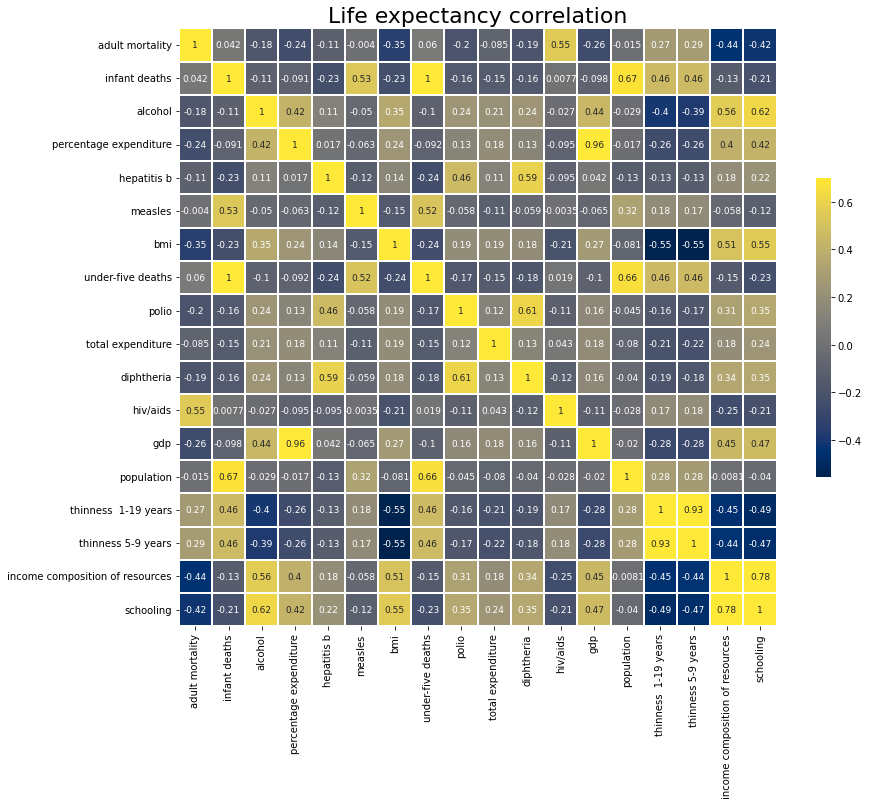

In [18]:
corr_plot(corr_matrix, "Life expectancy correlation")

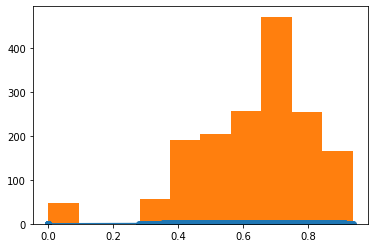

In [11]:
import scipy.stats as stats

h = sorted(df['income composition of resources'])
hmean = np.mean(h)
hstd = np.std(h)
pdf = stats.norm.pdf(h, np.mean(h), np.std(h))

plt.plot(h,pdf,'-o')

plt.hist(h)      

plt.show()  

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import mean_absolute_error

def rmse(y_test, y_pred):
    """root mean squared error"""
    return round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)

def mape(y_test, y_pred):
    return round(mean_absolute_percentage_error(y_test, y_pred), 4)

def wmape(y_true, y_pred):
    return sum(np.abs(y_true-y_pred))*100 / sum(y_true)

In [30]:
# Let's use 70% of random sample to train the model, and the remaining 30% of sample to test how good is the model
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size = 0.7, random_state=412)

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f'MAPE: {mape(y_test, y_pred)}')
print(f'WMAPE: {wmape(y_test, y_pred)}')
print(f'RMSE: {rmse(y_test, y_pred)}')
print(f'MAE: ${mean_absolute_error(y_test, y_pred):,.2f}')

MAPE: 0.0416
WMAPE: 3.987297350127764
RMSE: 3.6108
MAE: $2.75


In [22]:
# Smaller error means better model

### 4) Task

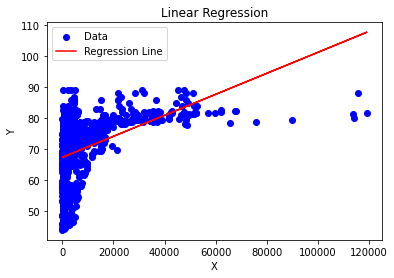

In [19]:
x = np.array(df['gdp'])
y = np.array(df['life expectancy'])

# Reshape x to a 2D array
X = x.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
predictions = model.predict(X)

# Plot the data points and the regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, predictions, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()
